<a href="https://colab.research.google.com/github/SAGARIKA-SHAH/takehome_user_engagement./blob/main/User_takehome_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/SAGARIKA-SHAH/takehome_user_engagement./main/takehome_user_engagement.csv")

In [4]:
df.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [5]:
list_users=df.user_id.unique()
list_users=list_users.tolist()
len(list_users)

8823

In [6]:
df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [7]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df.time_stamp=pd.to_datetime(df.time_stamp)
df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [9]:
df['year']=df.time_stamp.dt.year
df['month']=df.time_stamp.dt.month
df['day']=df.time_stamp.dt.day

In [10]:
df['week']=df.time_stamp.dt.week

<ipython-input-10-486eebb9c825>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=df.time_stamp.dt.week


In [11]:
df.isnull().sum()
df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
year                   int64
month                  int64
day                    int64
week                   int64
dtype: object

In [12]:
df.head(10)

,time_stamp,user_id,visited,year,month,day,week
0,2014-04-22 03:53:30,1,1,2014,4,22,17
1,2013-11-15 03:45:04,2,1,2013,11,15,46
2,2013-11-29 03:45:04,2,1,2013,11,29,48
3,2013-12-09 03:45:04,2,1,2013,12,9,50
4,2013-12-25 03:45:04,2,1,2013,12,25,52
5,2013-12-31 03:45:04,2,1,2013,12,31,1
6,2014-01-08 03:45:04,2,1,2014,1,8,2
7,2014-02-03 03:45:04,2,1,2014,2,3,6
8,2014-02-08 03:45:04,2,1,2014,2,8,6
9,2014-02-09 03:45:04,2,1,2014,2,9,6


In [13]:
df=df.drop_duplicates()


In [14]:
users=df.user_id.unique().tolist()


In [15]:
usernum=df.loc[0,'user_id']
user_adopted=[]
for i in range(df.shape[0]):
  if i==(df.shape[0]-1):
    break
  elif df.loc[i,'user_id']==usernum and df.loc[i,'user_id'] not in user_adopted and (abs(df.loc[i,'time_stamp']-df.loc[i+1,'time_stamp']).days<=7 and abs(df.loc[i,'time_stamp']-df.loc[i+1,'time_stamp']).days>=1 and (df.loc[i,'user_id']==df.loc[i+1,'user_id'])) and (abs(df.loc[i,'time_stamp']-df.loc[i+2,'time_stamp']).days<=7 and abs(df.loc[i,'time_stamp']-df.loc[i+2,'time_stamp']).days>=1 and (df.loc[i,'user_id']==df.loc[i+2,'user_id'])):
    user_adopted.append(df.loc[i,'user_id'])
  else:
    usernum=df.loc[i,'user_id']

In [16]:
len(user_adopted)

1607

In [17]:
user_adopted

[2,
 10,
 33,
 42,
 43,
 50,
 53,
 60,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 341,
 345,
 347,
 351,
 362,
 363,
 370,
 383,
 397,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 472,
 479,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 512,
 518,
 520,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 717,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1026,
 1027,
 1035,
 1039,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1123,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,
 1202,
 1212,
 12

year
2012     11855
2013    105725
2014     90337
Name: visited, dtype: int64

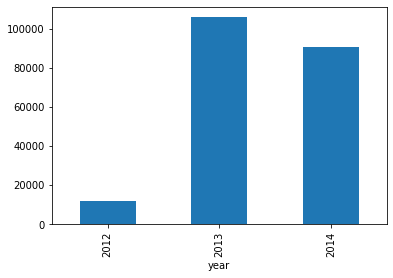

In [18]:
df.groupby('year')['visited'].sum().plot(kind='bar')
df.groupby('year')['visited'].sum()

In [19]:
# in the year 2013 there were max number if users visted the product.


In [20]:
df1=pd.read_csv('https://raw.githubusercontent.com/SAGARIKA-SHAH/takehome_user_engagement./main/takehome_users.csv', encoding='latin-1')

In [21]:
df1.shape

(12000, 10)

In [22]:
df1=df1.drop_duplicates()

In [23]:
df1.object_id.value_counts()

1        1
8004     1
7995     1
7996     1
7997     1
        ..
4003     1
4004     1
4005     1
4006     1
12000    1
Name: object_id, Length: 12000, dtype: int64

In [24]:
df1.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [25]:
adopted_user=[]
for i in range(df1.shape[0]):
  if df1.loc[i,'object_id'] in user_adopted:
    adopted_user.append(1)
  else:
    adopted_user.append(0)

In [26]:
df1=df1.assign(**{'adopted_user':adopted_user})

In [27]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [28]:
df1.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                    int64
dtype: object

In [29]:
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

In [30]:
del df1['last_session_creation_time']

In [31]:
df1.invited_by_user_id =df1.invited_by_user_id.fillna(0) # fill nan places with zero

In [32]:
df1.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
dtype: int64

In [33]:
df1.to_csv('adapted_user_engagement')

# **Data Visualization**

ord id which has max number of adopted users= 1 with value 16


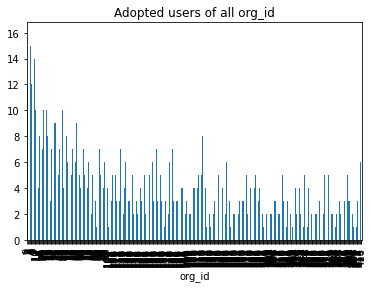

In [34]:
df1.groupby('org_id')['adopted_user'].sum().plot(kind='bar', title='Adopted users of all org_id')
org=df1.groupby('org_id')['adopted_user'].sum()
orgdf=pd.DataFrame(org)
print('ord id which has max number of adopted users=', org.idxmax(), 'with value', orgdf.loc[org.idxmax(),'adopted_user'])

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

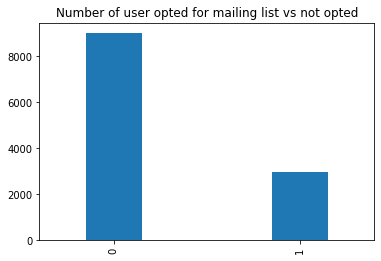

In [35]:
#code to check number of users opted for mailing list
df1.opted_in_to_mailing_list.value_counts().plot(kind='bar', title="Number of user opted for mailing list vs not opted", width=0.3)
df1.opted_in_to_mailing_list.value_counts()

In [36]:
#check number of adopted users opted for mailing list.
adopteduser_mailing=0
for i in range(df1.shape[0]):
  if df1.loc[i,'opted_in_to_mailing_list']==1 and df1.loc[i,'adopted_user']==1:
    adopteduser_mailing=adopteduser_mailing+1
print(adopteduser_mailing)

416


In [37]:
c1=0 #adopted users count if invited by any user.
c0=0
for i in range(df1.shape[0]):
  if df1.loc[i,'invited_by_user_id']==1 and df1.loc[i,'adopted_user']==1:
    c1=c1+1
  elif df1.loc[i,'invited_by_user_id']==0 and df1.loc[i,'adopted_user']==1: 
    c0=c0+1
print(c1, c0)

0 689


Adopted users enabled marketing drip 254


0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

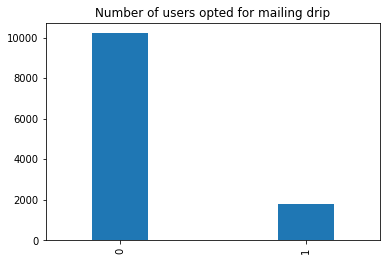

In [38]:
#code to check number of users opted for marketing drip
df1.enabled_for_marketing_drip.value_counts().plot(kind='bar', title='Number of users opted for mailing drip', width=0.3)
adopteduser_marketing=0
for i in range(df1.shape[0]):
  if df1.loc[i,'enabled_for_marketing_drip']==1 and df1.loc[i,'adopted_user']==1:
    adopteduser_marketing=adopteduser_marketing+1
print('Adopted users enabled marketing drip',adopteduser_marketing)
df1.enabled_for_marketing_drip.value_counts()

creation_source
GUEST_INVITE          359
ORG_INVITE            559
PERSONAL_PROJECTS     164
SIGNUP                293
SIGNUP_GOOGLE_AUTH    232
Name: adopted_user, dtype: int64

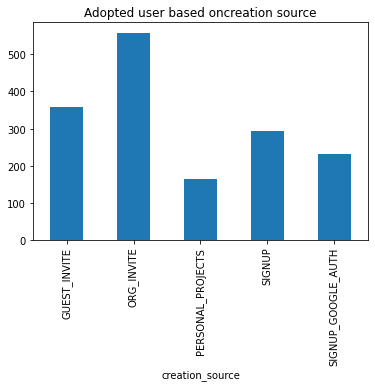

In [39]:
df1.groupby('creation_source')['adopted_user'].sum().plot(kind='bar', title='Adopted user based oncreation source')
df1.groupby('creation_source')['adopted_user'].sum()

In [40]:
df1.corr()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,1.000000,-0.032370,-0.022040,0.004110,0.001657,0.006515
opted_in_to_mailing_list,-0.032370,1.000000,0.483529,0.003432,0.007536,0.008512
enabled_for_marketing_drip,-0.022040,0.483529,1.000000,0.009275,0.003431,0.009626
org_id,0.004110,0.003432,0.009275,1.000000,-0.040868,0.063261
invited_by_user_id,0.001657,0.007536,0.003431,-0.040868,1.000000,0.020809
adopted_user,0.006515,0.008512,0.009626,0.063261,0.020809,1.000000


In [ ]:
#Based on our obersation Org users are more adopted then guest invite uses 

In [41]:
data=pd.merge(df1,df, how='left', left_on='object_id', right_on='user_id')
data.to_csv('product take home merged.csv')

In [42]:
data.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'adopted_user', 'time_stamp', 'user_id',
       'visited', 'year', 'month', 'day', 'week'],
      dtype='object')

In [ ]:
data.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted_user                     0
time_stamp                    3177
user_id                       3177
visited                       3177
year                          3177
month                         3177
day                           3177
week                          3177
dtype: int64

In [ ]:
#there are few users who never visited any product, so let us make them as 0

In [43]:
data.update(data[['user_id', 'visited', 'year', 'month','day']].fillna(0))

In [44]:
data.to_csv('Product_engagement_final')

In [45]:
data.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted_user                     0
time_stamp                    3177
user_id                          0
visited                          0
year                             0
month                            0
day                              0
week                          3177
dtype: int64

# **ML Model**

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data[['creation_source']]=data[['creation_source']].apply(le.fit_transform)

In [47]:
y=data.adopted_user.values
x=data[['object_id','creation_source','opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'visited','year']]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=3)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
result=roc_auc_score(y_test, y_pred)
print('Auroc score=', result)
result_act_pred=pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred})
print(result_act_pred)

Auroc score= 0.9344866293051627
       Actual_test  Predicted_test
0                1               1
1                1               1
2                1               1
3                1               1
4                1               1
...            ...             ...
63324            1               1
63325            1               1
63326            1               1
63327            1               1
63328            1               1

[63329 rows x 2 columns]


In [ ]:
#depth 20 is giving me max cross val score.

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=7)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt=DecisionTreeClassifier(max_depth=20)
dt.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print(y_pred)
result=roc_auc_score(y_test, y_pred)
print(result)

[1 0 1 ... 1 1 1]
0.9814806260453997


In [ ]:
# if max_depth is inc auroc is getting increased. 

In [50]:
importance = dtc.feature_importances_
list(zip(importance,x_test.columns))

[(0.31225383880216356, 'object_id'),
 (0.03960011718283765, 'creation_source'),
 (0.024597866525950623, 'opted_in_to_mailing_list'),
 (0.016276720734609153, 'enabled_for_marketing_drip'),
 (0.22531489613568736, 'org_id'),
 (0.12696188170959308, 'invited_by_user_id'),
 (0.233263724709554, 'visited'),
 (0.02173095419960463, 'year')]

In [51]:
features=[]
for i in range(len(dtc.feature_importances_)):
  features.append([round(dtc.feature_importances_[i],3),dtc.feature_names_in_[i]])
sorted(features)

[[0.016, 'enabled_for_marketing_drip'],
 [0.022, 'year'],
 [0.025, 'opted_in_to_mailing_list'],
 [0.04, 'creation_source'],
 [0.127, 'invited_by_user_id'],
 [0.225, 'org_id'],
 [0.233, 'visited'],
 [0.312, 'object_id']]